# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 12</center>

# <center>KMean Clustering</center>

![image-14.png](attachment:image-14.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Kmean algorithm to implement unsupervised clustering for iris dataset.

By the end of the lab, you should be able to :
- Differentiate supervised and unsupervised learning.


- Implement Kmean clustering any given dataset.





## <font color = blue>1. Loading Data

    - Lets load iris dataset for clustering. Note that you don't have to include target for unsupervised learning.
    

In [58]:
#import libraries first
import pandas as pd
from sklearn.datasets import load_iris


In [59]:
#Load data
iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [60]:
idf=pd.DataFrame(iris.data,columns=iris.feature_names)
idf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

## <font color = blue> 2. Data Manipulationa and visualization

In [62]:
#visualize your data here
new_df=idf.drop(["sepal length (cm)","sepal width (cm)"],axis=1)
new_df.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# box plot
sns.boxplot(data=new_df)
plt.show()


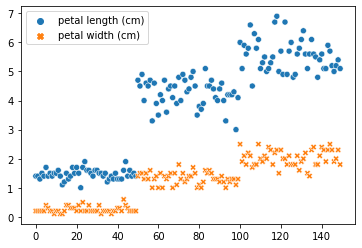

In [50]:
sns.scatterplot(data=new_df)
plt.show()

## <font color = blue> 3. Train model

In [130]:
#train your model here
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(new_df)


KMeans(n_clusters=2)

## <font color = blue> 4. Explore KMeans attributes

In [131]:
#check Kmean algorithm's attribute
Kmean.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

In [132]:
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## <font color = blue> 5. Prediction

In [133]:
#create sample data to make prediction. Interpret your output for unsupervised clustering
import numpy as np

sample_test=np.array([5.1,3.5])

second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)[0]

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0

## <font color = blue> 6. Plotting clusters with thier centroids

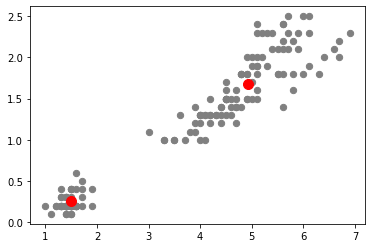

In [152]:
# Plot your datapoints and show the clusters in different colors along with thier cluster centroids.

plt.scatter(new_df["petal length (cm)"], new_df['petal width (cm)'], s =40, c='grey')
plt.scatter(4.92525253, 1.68181818, s=100, c='red')
plt.scatter(1.49215686, 0.2627451, s=100, c='r')

plt.show()


## <font color = blue> 7. Use elbow method to choose K for Kmean

In [142]:
# plot grah to decide K value for given dataset.

# error
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(new_df)
    distortions.append(kmeanModel.inertia_)

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


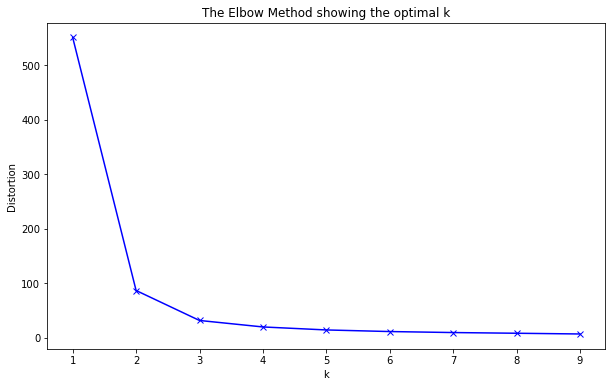

In [154]:
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()